In [81]:
%cd C:\Users\mgrinberg\Desktop\disc c\SDPC\SDPC\SDPC

C:\Users\mgrinberg\Desktop\disc c\SDPC\SDPC\SDPC


In [82]:
from variables import *
from SDPC_utils import *
from SDPC import *

import ctypes
import pickle as pkl
import pandas as dd
import numpy as np
import cvxpy as cp
from collections import OrderedDict
from time import time, strftime
from os import getcwd
import re
import warnings
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from scipy.sparse import csr_matrix, save_npz, load_npz, diags, vstack
from scipy.sparse.linalg import lsqr
from scipy.linalg import orth

In [62]:
%%time
cargar_data(query=None) #404

2 '.lst's encontrados.
Wall time: 4min 10s


In [63]:
%%time
Q0 = actualizar_base() #100

Errores en restricciones con indices [  6   7   8  38  56  57  66  74  82  95 106 107 119 133 140 142 160 168
 169 174 178]
Falta la distribución de productos para Cliente, Sucursal [[217332, 1], [271213, 3], [328728, 1], [329415, 2], [329415, 28], [329415, 29], [329415, 33], [329415, 35], [329415, 60], [329415, 233], [329415, 435], [329415, 436], [329415, 439], [329415, 441], [329415, 444], [329415, 448], [329415, 449], [329415, 450], [329415, 452], [329415, 456], [329415, 460], [329415, 468], [329415, 583], [329415, 725], [353242, 11], [353242, 16], [353242, 23], [353934, 1], [367629, 1], [437410, 1], [459067, 1], [467000, 2], [467407, 1], [474454, 1], [481468, 1], [487455, 1]]
Wall time: 45.6 s


In [31]:
validar()

Volcando resultado en Análisis.
Errores en restricciones con indices [  4   5   6   7   8  38  56  57  66  74  82  95 106 107 119 133 140 142
 160 168 169 174 178]
Ingresando resultados en Restricciones.
Errores en restricciones con indices [  4   5   6   7   8  38  56  57  66  74  82  95 106 107 119 133 140 142
 160 168 169 174 178]


Preparando optimización.
Errores en restricciones con indices [  4   5   6   7   8  38  56  57  66  74  82  95 106 107 119 133 140 142
 160 168 169 174 178]
Volcando resultado en Análisis.
Errores en restricciones con indices [  4   5   6   7   8  38  56  57  66  74  82  95 106 107 119 133 140 142
 160 168 169 174 178]
Ingresando resultados en Restricciones.
Errores en restricciones con indices [  4   5   6   7   8  38  56  57  66  74  82  95 106 107 119 133 140 142
 160 168 169 174 178]
Wall time: 2min 27s


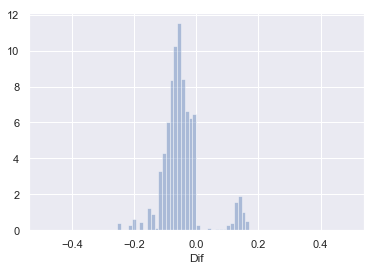

In [177]:
%%time
solve(polish=False)

In [83]:
t0 = time()
print('Preparando optimización.')
A, q0, b, idx_ineqs = prepare_vars()

Preparando optimización.
Errores en restricciones con indices [  6   7   8  38  56  57  66  74  82  95 106 107 119 133 140 142 160 168
 169 174 178]


In [84]:
sol = solve_nras(A,q0.copy(),b,idx_ineqs, verbose=True)

930524.4326261576	689843.023124469	526719.484163987	408370.8124375023	319442.6783945635	251269.5778243401	198362.71558966246	156978.8035244193	124438.37976277615	98760.389729434	78447.53935842113	62350.87754847383	49579.42641189306	39437.15607134621	31377.504832934228	24969.699627824615	19873.32951369328	15818.876203316844	12592.65155135207	10025.0571097114	7981.383118088191	6354.569134884124	5059.491289794319	4028.444649468821	3207.5647515619503	2553.989709913461	2033.6074785581513	1619.2664068912025	1289.3529727220443	1026.6609366559446	817.4918659877732	650.9395353422477	518.3204826919302	412.72082939696423	328.63554278266884	261.68129492490954	208.36787145262244	165.91615776721406	132.1132674507467	105.19714715369504	83.76474678466427	66.6988536953381	53.10986833148216	42.28943097050995	33.673501678869826	26.812939924769623	21.35012770729189	17.000287700742454	13.536673758003174	10.778724719162874	8.582676873446257	

In [86]:
Q = pd.read_csv(TMP_PATH+'Q1.csv', sep=';')

In [ ]:
Q[neto_col+'_1'] = sol
Q['Dif'] = (1 - (Q[neto_col+'_1'] / Q[neto_col+'_w']))

In [ ]:
data

({'Norma q-q0': 87.23,
  'Max': 0.15,
  'Min': -0.32,
  'Media': -0.036,
  'Mayores a 1.00': 0.0,
  'Mayores a 0.30': 5.0,
  'Negativos': 0.0,
  'Norma Aq-b': 8.58},
 <Figure size 640x480 with 1 Axes>)

In [ ]:
sol, data = solve_ultra(A, sol, b, idx_ineqs, max_tries=2)

Thresh 1.00 Coef 5.00 {'Norma q-q0': 87.23, 'Max': 0.16, 'Min': -0.33, 'Media': -0.04, 'Mayores a 1.00': 0, 'Mayores a 0.30': 5, 'Negativos': 0, 'Norma Aq-b': 8.58} 
Thresh 0.92 Coef 4.60 {'Norma q-q0': 87.23, 'Max': 0.16, 'Min': -0.33, 'Media': -0.04, 'Mayores a 1.00': 0, 'Mayores a 0.30': 5, 'Negativos': 0, 'Norma Aq-b': 8.58} 


In [ ]:
Q.to_csv(TMP_PATH + 'Q1.csv', sep=';', index=False)
validar(Q=Q)
#ctypes.windll.user32.MessageBoxW(0, f"Distribución calculada. {time() - t0:.0f} segundos.",  "Terminado", 1)

In [ ]:
th1, th2 = 1, 0.3

In [ ]:
%%time
sol1, data = solve_ultra(A, q0.copy(), b, idx_ineqs, th_max=th1, th_min=th2, max_iters=10, min_coef=2, max_coef=10, max_tries=5, margin=10, pt=1, pc=2)

In [ ]:
%%time
sol2 = solve_nras(A,q0.copy(),b,idx_ineqs)

In [ ]:
data = check_sol(A, sol, b, ylim=11)

In [ ]:
%%time
sol3, data = solve_ultra(A, sol2.copy(), b, idx_ineqs, th_max=th1, th_min=th2, max_iters=5, min_coef=1.5, max_coef=20, max_tries=1, margin=10, pt=2 , pc=2)

In [ ]:
data = check_sol(A, sol3, b, th1=th1, th2=th2)

In [ ]:
Q[neto_col + '_1'] = sol2
Q['Dif'] = (1 - (Q[neto_col+'_1'] / Q[neto_col+'_w']))
Q.to_csv(TMP_PATH + 'Q1.csv', sep = ';', index=False)
validar()

In [ ]:
params = dict(th_max = [2, 0.5, 0.2],
         th_min = [0.05, 0.1, 0.2, 0.4],
         max_iters = [5, 10],
          min_coef = [1.05, 1.2, 2],
          max_coef = [1000, 100, 10],
          max_tries = [2, 4],
          pt = [1,2,4],
          pc = [1,2,4],
          shuffle= [True, False],
             )

In [ ]:
data = []
for i in range(1, 20):
    params_ = {}
    for k in params:
        if type(params[k]) == list:
            params_[k] = np.random.choice(params[k])
        else:
            params_[k] = params[k]
    sol, data = solve_ultra(A, q0.copy(), b, idx_ineqs, **params_)
    data_ = check_sol(A, sol.copy(), b, th1=0.8, th2=0.2)
    data.append((data_, params_))

$$argmin_{q} | ( \mathbf{q} - \mathbf{q_{0}} ) \oslash  \mathbf{q_{0}} |^{2} \;,\; | ( \mathbf{q} - \mathbf{q_{0}} ) \oslash  \mathbf{q_{0}} |^{\infty}
\\subject\:to:  {Rq = b \;, \\ Mq \leq d}$$

$$argmin_{q}  \lambda| ( \mathbf{q} - \mathbf{q_{0}} ) \oslash  \mathbf{q_{0}} |^{2} + \lambda| ( \mathbf{q} - \mathbf{q_{0}} ) \oslash  \mathbf{q_{0}} |^{\infty}
\\subject\:to: \quad {Rq = b \;, \\ Mq \leq d}$$


In [ ]:
def f():
    return np.linalg.norm(b - A @ q)

In [ ]:
scipy.optimize.fmin_slsqp()

In [ ]:
loc_dir = df.groupby(['Localidad']).first()['Direcci¢n']

In [ ]:
import requests as rq
import json

In [ ]:
def geodecode(local):
    url = 'https://maps.googleapis.com/maps/api/geocode/json?address='
    headers = {'User-Agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.106 Mobile Safari/537.36'}
    q = local.replace(' ', '+')
    print(url+q)
    c = rq.get(url+q, headers = headers).content
    data = json.loads(c)
    x, y = data['results'][0]['geometry']['location'].items()
    return (x[1], y[1]) if 'lat' in x else (y[1], x[1])

In [ ]:
verbose = True
precision = 10
max_tries = 5
periodo = '201909'

In [2]:
import re

In [30]:
import pyodbc 
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix

In [17]:
conn = pyodbc.connect('Driver={SQL Server Native Client 11.0};'
					'Server=10.21.200.100;'
					'Database=DPC;'
					'Trusted_Connection=no;'
					'UID=dpcdesa;'
					'PWD=Mhsa201905;'
					'PORT=1433;'
						)

In [108]:
restr = pd.read_sql('SELECT * from RestriccionesView WHERE Periodo = '+str(periodo), conn)#.fillna(np.nan)
PRESUP = pd.read_sql('SELECT * from PresupuestosView WHERE Periodo = '+str(periodo), conn)#.fillna(np.nan)
restr = restr.append(PRESUP)
PRESUP = PRESUP.set_index('Prod')['Cantidad']

In [95]:
Q = f"""SELECT R.*, MC.Canal, MC.Zona, MC.CMHSA, MC.GrupoEconomico FROM ResultadoWarmStart R
	INNER JOIN MaestroClientes MC
	ON R.Cliente = MC.Cliente AND R.Suc = MC.Sucursal AND R.Periodo = {periodo} AND MC.Periodo = {periodo}"""


In [96]:
Q = pd.read_sql(Q, conn)

In [97]:
Q['GrupoEconomico'].unique()

array([ nan, 394., 395., 414., 385., 389., 402., 410., 406., 383., 397.,
       409., 408., 391., 384., 387., 411., 388., 403., 401., 393., 407.,
       404., 396., 392., 405., 400., 413., 390., 412., 398., 386., 399.])

In [98]:
restr['Periodo'].unique()

array([201909], dtype=int64)

In [104]:
restr[restr['Prod'] == Q[Q['WarmStart'] == 0]['Prod'].unique()[0]]

,CMHSA,Canal,Cantidad,Cliente,Flia,GrupoEconomico,Periodo,PorcentajeRelativo,PorcentajeTotal,Prod,Simb,Suc,Zona
131,NaN,NaN,0,NaN,NaN,NaN,201909,NaN,NaN,3150,NaN,NaN,NaN


In [131]:
tot = Q.groupby('Prod')['WarmStart'].sum()
tot[tot < 100]

Prod
3150    0.0
Name: WarmStart, dtype: float64

In [132]:
#Q = Q[Q['WarmStart'] != 0]

In [111]:
Q.columns = [c.replace('_', '') for c in Q.columns]

q = Q['WarmStart'].values
pr_fl = Q.groupby('Prod')['Flia'].first()

A = []
b = []

for i, row in restr.iterrows():

	print(i, end=' ')

	cols = row[['Zona', 'CMHSA', 'Canal', 'GrupoEconomico', 'Cliente', 'Suc', 'Flia', 'Prod']].dropna()
	mask = np.logical_and.reduce([(Q[c] == v) for c,v in cols.items()])
	A.append(mask)

	row = row.dropna()

	if 'Cantidad' in row.index:
		if (('Flia' in row.index) | ('Prod' in row.index)):
			b.append(row['Cantidad'])
		else:
			b.append(PRESUP.sum())
	elif 'PorcentajeRelativo' in row.index:
		uni = (row['PorcentajeRelativo']/100) * (Q['WarmStart'].values @ mask)
		b.append(uni)
	elif 'PorcentajeTotal' in row.index:
		if ('Flia' in row.index):
			uni = (row['PorcentajeTotal']/100) * PRESUP.loc[pr_fl[pr_fl == row['Flia']].index.values].sum()
		elif 'Prod' in row.index:
			uni = (row['PorcentajeTotal']/100) * PRESUP[pr_fl[pr_fl.index == row['Prod']].index.values].sum()
		else:
			uni = (row['PorcentajeTotal']/100) * PRESUP.sum()
		b.append(uni)
	else:
		raise Exception("Error en restriccion.")
    
    print('Restricciones terminadas.')

0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 

In [100]:
Q.head()

,Periodo,Cliente,Suc,Prod,Flia,VtaNeta,WarmStart,Z,Canal,Zona,CMHSA,GrupoEconomico
0,201909,470836,1,3181,13,3.18,2.588064,None,310,2378,165,NaN
1,201909,358369,1,3210,1,4.00,3.463760,None,311,2409,0,NaN
2,201909,482716,1,1663,13,0.40,0.282606,None,311,2387,0,NaN
3,201909,480163,1,1711,1,4.50,2.973855,None,310,2378,74,NaN
4,201909,398071,20,3621,1,180.00,128.428245,None,311,2391,0,NaN


In [121]:
tot = Q.groupby('Prod')['WarmStart'].sum()
tot[tot < 100]

Prod
3150    0.0
Name: WarmStart, dtype: float64

In [121]:
tot = Q.groupby('Prod')['WarmStart'].sum()
tot[tot < 100]

Prod
3150    0.0
Name: WarmStart, dtype: float64

In [122]:
idx_ineqs = restr[restr.loc[:,'Simb'].astype(float) == 1].index.values.astype('int32')
#del restr
#del PRESUP
A = csr_matrix(np.vstack(A).astype('bool'))
b = np.array(b).astype('int64')

print('Idx de restricciones con 0 variables', np.where(A.sum(axis=1) == 0)[0])
print('Idx de objetivos = 0', np.where(b == 0)[0])
print('Idx donde q = 0', np.where(q == 0)[0])

Idx de restricciones con 0 variables []
Idx de objetivos = 0 [132]
Idx donde q = 0 [   1035    5249    5834 ... 1609745 1612647 1613398]


In [127]:
np.where(q == 0)[0].shape

(1774,)

In [ ]:
c = 0
d_ = np.inf
while True:
	p = (b / (A @ q))
	idx_ineqs_ok = np.where(p[idx_ineqs] > 1 + 1e-10)
	p[idx_ineqs_ok] = 1
	d = np.linalg.norm((b - (A @ q))[[idx for idx in range(A.shape[0]) if idx not in idx_ineqs_ok]])
	if verbose: print(d, end='	')
	if d >= d_:
		c += 1
	d_ = d
	if (c == max_tries) | (d_ < precision):
		break
	A_= A.multiply(p[:, np.newaxis])
	P = np.squeeze(np.array(np.true_divide(A_.sum(0), (A_!=0).sum(0))))
	q = q * P

Q.loc[:, 'Z'] = q
Q = Q[['Periodo', 'Cliente', 'Suc', 'Prod', 'Flia', 'VtaNeta', 'WarmStart', 'Z']]
print(p)

In [ ]:
if PRESUP[~PRESUP.index.isin(tabla_pr[p_col])].shape[0] > 0: 
    raise Exception('Falta información en la tabla para los siguientes productos', PRESUP[~PRESUP.index.isin(tabla_pr[p_col])].values)
if not Q0[Q0.isnull().any(axis=1)].shape[0] == 0: 
    print("Falta la distribución de productos para Cliente, Sucursal", Q0[Q0.isnull().any(axis=1)][[cl_col, s_col]].astype(int).values.tolist())
    Q0 = Q0.dropna(axis=0)
if not Q0[cl_col].isin(m[cl_col]).all(): raise Exception("Se encontraron sin distribución de productos los clientes, sucursales:", Q0[Q0.isnull().any(axis=1)][cl_col].astype(int).values.tolist())
if not Q0[p_col].isin(PRESUP.index).all(): raise Exception( "Error. Productos fuera de presupuesto.", Q0[~Q0[p_col].isin(PRESUP.index)].astype(int).values.tolist())

assert Q0[Q0.isnull().any(axis=1)].shape[0] == 0
